In [7]:
import torch

# basic operations on pytorch


## scalar

In [8]:
# to define random scale
a=torch.rand(5)
print(a)
print(type(a))
print(a.size())
print(a.shape)

tensor([0.9881, 0.9177, 0.2260, 0.1142, 0.8227])
<class 'torch.Tensor'>
torch.Size([5])
torch.Size([5])


## one dimension tensor

In [10]:
a = torch.FloatTensor([23,23.5,24,26.4,27.5, 23.0])
print(a.shape)
print(a)

torch.Size([6])
tensor([23.0000, 23.5000, 24.0000, 26.4000, 27.5000, 23.0000])


## two dimension tensor

In [11]:
a= torch.rand((3,3))
print(a)
print(a.shape)
print(type(a))

tensor([[0.6370, 0.8146, 0.7316],
        [0.7971, 0.5915, 0.8463],
        [0.4170, 0.6547, 0.5924]])
torch.Size([3, 3])
<class 'torch.Tensor'>


## 3 dimenstion tensor

In [13]:
from PIL import Image
import numpy as np

In [14]:
# read an image
im = Image.open('lena.png')
# change to numpy
im = np.array(im)
im.shape
print(im.shape)
print(type(im))
# from the numpy  to tensor
im_tensor= torch.from_numpy(im)
print(type(im_tensor))
# tensor ->numpy
im1= im_tensor.numpy()
print(type(im1))

(256, 256, 3)
<class 'numpy.ndarray'>
<class 'torch.Tensor'>
<class 'numpy.ndarray'>


## slice of tensor

In [15]:
a = torch.FloatTensor([2,3,5,6,20.3, 5.1])
print(a[:3])
print(a[3:5])

tensor([2., 3., 5.])
tensor([ 6.0000, 20.3000])


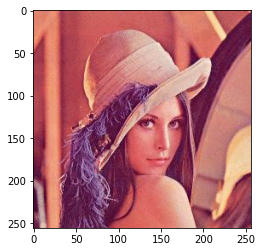

In [27]:
import matplotlib.pyplot as plt
# plt.imshow(im)
plt.imshow(im_tensor)

## variable

In [19]:
from torch.autograd import Variable

In [28]:
# define a tensor == matrix
a= torch.ones(2,2)
print(a)
# set requires_grad =true, default this false
x = Variable(a, requires_grad=True)
# function of mean
y = x.mean()
y.backward()
print(y)
print('gradient:',x.grad)

tensor([[1., 1.],
        [1., 1.]])
tensor(1., grad_fn=<MeanBackward0>)
gradient: tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])


In [52]:
y.backward()

In [53]:
print(x.grad)

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])


## operations on pytorch

In [33]:
# define a tensor
x= torch.randn(3,3)
print('data type:',type(x))
print('x:',x)
print('y:',y)
y = torch.randn(3,3)
# print(x,y)
print('pytorch add', torch.add(x,y))
x1=x.numpy()
y1=y.numpy()
print('numpy add',x1+y1)
print('pytorch multiplication:', torch.mul(x,y))
print('numpy multiplication:',x1*y1)
print('pytorch sub:',torch.sub(x,y))
print('numpy sub:',x1-y1)

data type: <class 'torch.Tensor'>
x: tensor([[-0.1049,  1.7060,  1.4640],
        [ 1.1760,  0.9634,  0.4651],
        [ 0.7511, -0.0394,  0.7874]])
y: tensor([[-1.0089,  0.2017, -1.6773],
        [-0.4788, -0.6921, -0.6365],
        [ 0.1397,  0.7738,  2.2136]])
pytorch add tensor([[-0.2410,  2.2079,  2.8011],
        [ 2.1426,  0.5089,  1.3634],
        [ 0.3608,  0.3524,  1.6015]])
numpy add [[-0.241011    2.2079391   2.8010895 ]
 [ 2.1426172   0.5088953   1.3633658 ]
 [ 0.36075464  0.3524395   1.6014624 ]]
pytorch multiplication: tensor([[ 0.0143,  0.8563,  1.9575],
        [ 1.1367, -0.4378,  0.4178],
        [-0.2932, -0.0155,  0.6410]])
numpy multiplication: [[ 0.01427735  0.8562735   1.9574999 ]
 [ 1.1367351  -0.4378246   0.41780263]
 [-0.2932453  -0.0154524   0.640993  ]]
pytorch sub: tensor([[ 0.0313,  1.2041,  0.1269],
        [ 0.2094,  1.4178, -0.4331],
        [ 1.1415, -0.4313, -0.0266]])
numpy sub: [[ 0.03125525  1.2041185   0.12689853]
 [ 0.20944846  1.417841   -0.4330

# Gradient updation

## Demo of numpy 

using one Cubic polynomial ($y = a + b x + c x^2 + d x^3$) to approximate the sin(x)

x: [-3.14159265 -3.13844949 -3.13530633 ...  3.13530633  3.13844949
  3.14159265]
a: -1.543682721754774
99 1544.9428520002107
199 1092.7140225694875
299 773.7591470054779
399 548.7547556788343
499 389.99586857642646
599 277.9578869919804
699 198.87767203706494
799 143.05107386930518
899 103.63431351544799
999 75.79983731724428
1099 56.14163951172203
1199 42.2562121747424
1299 32.447176999796966
1399 25.517043239059493
1499 20.62035779148625
1599 17.160125763452996
1699 14.714736545862905
1799 12.986401195375592
1899 11.764762091212718
1999 10.901206063333834
Result: y = -0.0480164463708716 + 0.8617187354950534 x + 0.008283635996091778 x^2 + -0.09403845088965576 x^3


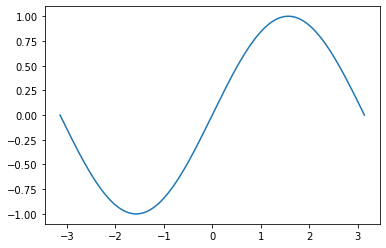

In [36]:
import numpy as np
import math

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

print('x:',x)
# drawing the sin(x)
plt.plot(x,y)


# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

print('a:',a)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

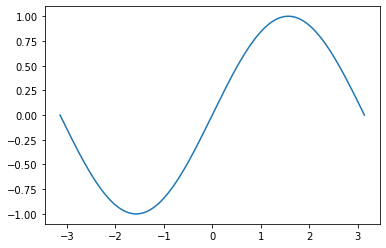

In [63]:
plt.plot(x,y)

## gradient computation with pytorch

In [37]:
import torch
import math

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 31.846681594848633
199 25.11320686340332
299 20.348922729492188
399 16.97753143310547
499 14.591797828674316
599 12.903556823730469
699 11.708882331848145
799 10.863480567932129
899 10.265233993530273
999 9.841882705688477
1099 9.542308807373047
1199 9.330309867858887
1299 9.180292129516602
1399 9.074131965637207
1499 8.999008178710938
1599 8.945847511291504
1699 8.90822696685791
1799 8.881607055664062
1899 8.862767219543457
1999 8.84943675994873
Result: y = -0.006012605037540197 + 0.8567904829978943 x + 0.0010372757678851485 x^2 + -0.09333745390176773 x^3


## simpler verison 

In [38]:
import torch
import math
x= torch.linspace(-math.pi, math.pi, 2000)
y= torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1,2,3])
# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3) 
xx= x.unsqueeze(-1).pow(p)
# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
        torch.nn.Linear(3,1),
        torch.nn.Flatten(0,1)
)
# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn= torch.nn.MSELoss(reduction='sum')
learning_rate = 1e-6

for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred=model(xx)
    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss= loss_fn(y_pred, y)
    if t%100==99:
        print(t, loss.item())
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()
    
    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param-= learning_rate*param.grad
# You can access the first layer of `model` like accessing the first item of a list            
linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 357.3360290527344
199 239.6003875732422
299 161.6527862548828
399 110.04253387451172
499 75.86763763427734
599 53.23579788208008
699 38.246707916259766
799 28.318273544311523
899 21.74124526977539
999 17.38364028930664
1099 14.49624252319336
1199 12.582717895507812
1299 11.314406394958496
1399 10.473611831665039
1499 9.916111946105957
1599 9.54641056060791
1699 9.301196098327637
1799 9.138522148132324
1899 9.030576705932617
1999 8.958930015563965
Result: y = 0.0033166930079460144 + 0.8455748558044434 x + -0.0005721842753700912 x^2 + -0.0917421206831932 x^3


## more simpler version

In [6]:
import torch
import math
x= torch.linspace(-math.pi, math.pi, 2000)
y= torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1,2,3])
# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3) 
xx= x.unsqueeze(-1).pow(p)
# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
        torch.nn.Linear(3,1),
        torch.nn.Flatten(0,1)
)
# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn= torch.nn.MSELoss(reduction='sum')
learning_rate = 1e-3

optimizer =torch.optim.RMSprop(model.parameters(), lr= learning_rate)
for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred=model(xx)
    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss= loss_fn(y_pred, y)
    if t%100==99:
        print(t, loss.item())
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()
    
    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
#     with torch.no_grad():
#         for param in model.parameters():
#             param-= learning_rate*param.grad
    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
# You can access the first layer of `model` like accessing the first item of a list            
linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 895.9431762695312
199 363.0416259765625
299 293.76983642578125
399 236.3955841064453
499 179.84771728515625
599 127.09664916992188
699 82.4174575805664
799 48.61484146118164
899 26.431854248046875
999 14.517382621765137
1099 9.905057907104492
1199 8.913549423217773
1299 9.279958724975586
1399 8.99403190612793
1499 9.049576759338379
1599 8.940196990966797
1699 8.893872261047363
1799 8.907472610473633
1899 8.931538581848145
1999 8.925025939941406
Result: y = -0.0005000014789402485 + 0.8572492599487305 x + -0.0005000390810891986 x^2 + -0.09282146394252777 x^3


# CNN for image classification

## data ready

import package

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## show the image

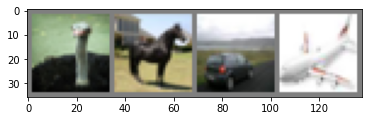

 bird horse   car plane


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## define the net

In [5]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

## loss function and optimizer

In [6]:
import torch.optim as optim
# define the cross entropy loss function 
criterion = nn.CrossEntropyLoss()
# define the optimizer stochastic gradient descent，SGD ...
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Train the network

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

## store the model

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

## testing

In [8]:
# load the net and trained parameters
net = Net()
net.load_state_dict(torch.load(PATH))

#load the image
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

NameError: name 'Net' is not defined

## test one image

In [ ]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

## test all images

In [9]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

NameError: name 'testloader' is not defined